In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import misc
import cv2 as cv

In [2]:
path_classes = '../Img/GoodImg/Bmp/'
classes_names = sorted(os.listdir(path_classes))
dic_imgs ={}

for i, name_class in enumerate(classes_names):
    dic_imgs[classes_names[i]]=np.array(os.listdir(path_classes + classes_names[i]))
    print "class: ", name_class, " total samples: ", len(dic_imgs[classes_names[i]])

class:  Sample001  total samples:  105
class:  Sample002  total samples:  79
class:  Sample003  total samples:  70
class:  Sample004  total samples:  50
class:  Sample005  total samples:  47
class:  Sample006  total samples:  64
class:  Sample007  total samples:  64
class:  Sample008  total samples:  48
class:  Sample009  total samples:  32
class:  Sample010  total samples:  34
class:  Sample011  total samples:  558
class:  Sample012  total samples:  115
class:  Sample013  total samples:  215
class:  Sample014  total samples:  191
class:  Sample015  total samples:  446
class:  Sample016  total samples:  79
class:  Sample017  total samples:  143
class:  Sample018  total samples:  193
class:  Sample019  total samples:  302
class:  Sample020  total samples:  77
class:  Sample021  total samples:  92
class:  Sample022  total samples:  215
class:  Sample023  total samples:  149
class:  Sample024  total samples:  363
class:  Sample025  total samples:  382
class:  Sample026  total samples:  15

In [3]:
X=[];
Y=[];
for i in range(len(classes_names)):
    for j in range(len(dic_imgs[classes_names[i]])):

        path_image = path_classes+classes_names[i]+'/'+dic_imgs[classes_names[i]][j];
        img=cv.imread(path_image);
        img=cv.cvtColor(img,cv.COLOR_BGR2RGB);
        img=cv.resize(img,(32,32));
        X.append(img)
        Y.append(i)

X=np.asanyarray(X)
Y=np.asanyarray(Y)

In [4]:
from sklearn.model_selection import train_test_split
test_size = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=test_size)
print X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

(4655, 32, 32, 3) (1164, 32, 32, 3) (4655,) (1164,)


In [5]:
X_train = X_train.reshape([-1, 32, 32, 3])
X_test = X_test.reshape([-1, 32, 32, 3])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [28]:
model=  keras.models.Sequential()
model.add(keras.layers.Conv2D(30, (5, 5), input_shape=(32, 32,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(15, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(37, activation='softmax'))

model.summary();

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 30)        2280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 540)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               6

In [29]:
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=150, batch_size=64,
                    validation_data=(X_test, Y_test))

Train on 4655 samples, validate on 1164 samples
Epoch 1/150
4655/4655 [==============================] - 4s 959us/sample - loss: 3.5302 - acc: 0.0391 - val_loss: 3.4052 - val_acc: 0.0765
Epoch 2/150
4655/4655 [==============================] - 4s 760us/sample - loss: 3.3871 - acc: 0.0782 - val_loss: 3.3209 - val_acc: 0.0859
Epoch 3/150
4655/4655 [==============================] - 4s 761us/sample - loss: 3.3310 - acc: 0.0930 - val_loss: 3.3106 - val_acc: 0.0859
Epoch 4/150
4655/4655 [==============================] - 3s 750us/sample - loss: 3.3154 - acc: 0.0926 - val_loss: 3.2973 - val_acc: 0.0868
Epoch 5/150
4655/4655 [==============================] - 4s 828us/sample - loss: 3.3123 - acc: 0.0934 - val_loss: 3.2965 - val_acc: 0.0945
Epoch 6/150
4655/4655 [==============================] - 4s 775us/sample - loss: 3.3066 - acc: 0.0965 - val_loss: 3.2952 - val_acc: 0.0859
Epoch 7/150
4655/4655 [==============================] - 4s 843us/sample - loss: 3.2996 - acc: 0.0986 - val_loss: 3.29

4655/4655 [==============================] - 3s 730us/sample - loss: 0.2241 - acc: 0.9334 - val_loss: 0.5221 - val_acc: 0.8806
Epoch 118/150
4655/4655 [==============================] - 3s 718us/sample - loss: 0.2409 - acc: 0.9319 - val_loss: 0.5324 - val_acc: 0.8754
Epoch 119/150
4655/4655 [==============================] - 3s 720us/sample - loss: 0.2305 - acc: 0.9291 - val_loss: 0.5305 - val_acc: 0.8806
Epoch 120/150
4655/4655 [==============================] - 3s 711us/sample - loss: 0.2200 - acc: 0.9313 - val_loss: 0.5239 - val_acc: 0.8797
Epoch 121/150
4655/4655 [==============================] - 3s 720us/sample - loss: 0.2206 - acc: 0.9332 - val_loss: 0.5316 - val_acc: 0.8883
Epoch 122/150
4655/4655 [==============================] - 4s 767us/sample - loss: 0.2271 - acc: 0.9272 - val_loss: 0.5193 - val_acc: 0.8814
Epoch 123/150
4655/4655 [==============================] - 3s 705us/sample - loss: 0.2123 - acc: 0.9343 - val_loss: 0.5167 - val_acc: 0.8866
Epoch 124/150
4655/4655 [==

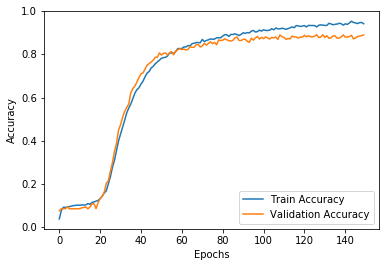

In [30]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
model.save('my_model.h5')

In [25]:
def indentificar(features):
    if np.argmax(features)==0:
        return 0
    if np.argmax(features)==1:
        return 1
    if np.argmax(features)==2:
        return 2
    if np.argmax(features)==3:
        return 3
    if np.argmax(features)==4:
        return 4
    if np.argmax(features)==5:
        return 5
    if np.argmax(features)==6:
        return 6
    if np.argmax(features)==7:
        return 7
    if np.argmax(features)==8:
        return 8
    if np.argmax(features)==9:
        return 9
    if np.argmax(features)==10:
        return 'A'
    if np.argmax(features)==11:
        return 'B'
    if np.argmax(features)==12:
        return 'C'
    if np.argmax(features)==13:
        return 'D'
    if np.argmax(features)==14:
        return 'E'
    if np.argmax(features)==15:
        return 'F'
    if np.argmax(features)==16:
        return 'G'
    if np.argmax(features)==17:
        return 'H'
    if np.argmax(features)==18:
        return 'I'
    if np.argmax(features)==19:
        return 'J'
    if np.argmax(features)==20:
        return 'K'
    if np.argmax(features)==21:
        return 'L'
    if np.argmax(features)==22:
        return 'M'
    if np.argmax(features)==23:
        return 'N'
    if np.argmax(features)==24:
        return 'O'
    if np.argmax(features)==25:
        return 'P'
    if np.argmax(features)==26:
        return 'Q'
    if np.argmax(features)==27:
        return 'R'
    if np.argmax(features)==28:
        return 'S'
    if np.argmax(features)==29:
        return 'T'
    if np.argmax(features)==30:
        return 'U'
    if np.argmax(features)==31:
        return 'V'
    if np.argmax(features)==32:
        return 'W'
    if np.argmax(features)==33:
        return 'X'
    if np.argmax(features)==34:
        return 'Y'
    if np.argmax(features)==35:
        return 'Z'
        
    
        

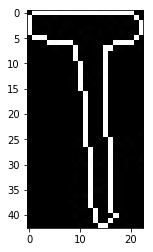

In [43]:
ima=cv.imread('../Letras/caracter_12_2.jpg')
ima=cv.cvtColor(ima,cv.COLOR_BGR2RGB)
plt.imshow(ima)
ima=cv.resize(ima,(32,32))
ima = ima.reshape([-1, 32, 32, 3])
ima = ima.astype('float32')
ima /= 255

In [44]:
features=model2.predict(ima)
print indentificar(features)

I


In [3]:
from tensorflow.keras.models import load_model
model2=load_model('my_model.h5')

In [4]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 30)        2280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 540)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               6

In [9]:
features=model2.predict(ima)
print np.argmax(features)

20
